[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
Portfolio Mean Return: nan
Portfolio Standard Deviation: nan
CAPM Beta: 1.1212102451703692
CAPM Alpha: 0.0013228735767858617


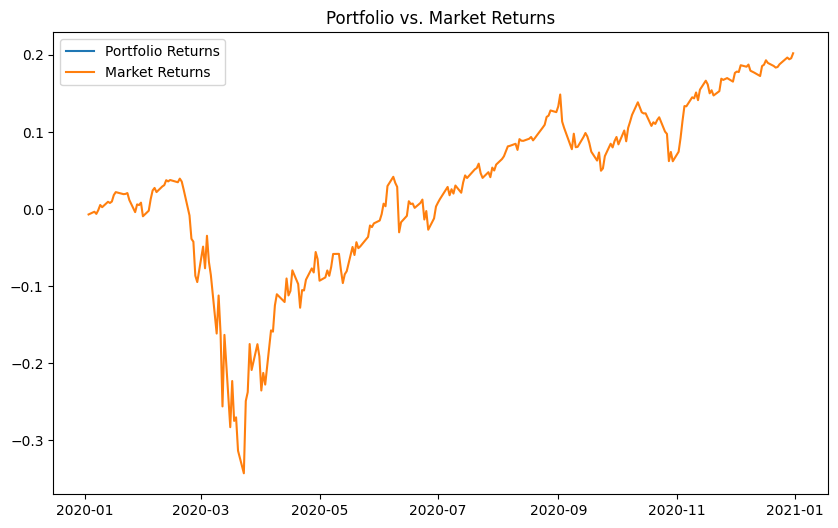

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define stock symbols and historical data
stocks = ['AAPL', 'MSFT']
start_date = '2020-01-01'
end_date = '2021-01-01'

# Fetch historical data using yfinance
import yfinance as yf
data = yf.download(stocks, start=start_date, end=end_date)

# Calculate daily returns for the stocks
data['AAPL Daily Return'] = data['Adj Close']['AAPL'].pct_change()
data['MSFT Daily Return'] = data['Adj Close']['MSFT'].pct_change()

# Create a portfolio with equal weights
weights = [0.5, 0.5]
portfolio_returns = np.dot(data[['AAPL Daily Return', 'MSFT Daily Return']], weights)

# Calculate portfolio statistics
portfolio_mean_return = portfolio_returns.mean()
portfolio_std_dev = portfolio_returns.std()

# Calculate CAPM using S&P 500 as the market benchmark
market_data = yf.download('^GSPC', start=start_date, end=end_date)
market_returns = market_data['Adj Close'].pct_change()

slope, intercept, r_value, p_value, std_err = stats.linregress(market_returns[1:], portfolio_returns[1:])

# Display portfolio statistics and CAPM results
print("Portfolio Mean Return:", portfolio_mean_return)
print("Portfolio Standard Deviation:", portfolio_std_dev)
print("CAPM Beta:", slope)
print("CAPM Alpha:", intercept)

# Plot the portfolio returns and the market benchmark
plt.figure(figsize=(10, 6))
plt.plot(portfolio_returns.cumsum(), label='Portfolio Returns')
plt.plot(market_returns.cumsum(), label='Market Returns')
plt.legend()
plt.title('Portfolio vs. Market Returns')
plt.show()
